In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')  # Optional: Mount Google Drive if storing tokens there

# Change directory to your Google Drive
# os.chdir('/content/drive/My Drive')  # Adjust path as needed for your specific folder

# Print the current working directory
print("Current working directory:", os.getcwd())


Mounted at /content/drive
Current working directory: /content


In [2]:

pip install -q huggingface-hub

In [3]:

from huggingface_hub import snapshot_download

In [4]:
# Define your target folder
target_folder = '/content/drive/My Drive/llava-model'

# Download the LLaVA model checkpoint
model_path = snapshot_download(repo_id="llava-hf/llava-1.5-7b-hf", cache_dir=target_folder)

print(f"Model downloaded to: {model_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Model downloaded to: /content/drive/My Drive/llava-model/models--llava-hf--llava-1.5-7b-hf/snapshots/8c85e9a4d626b7b908448be32c1ba5ad79b95e76


In [5]:
import os
print(os.path.abspath(model_path))

/content/drive/My Drive/llava-model/models--llava-hf--llava-1.5-7b-hf/snapshots/8c85e9a4d626b7b908448be32c1ba5ad79b95e76


In [ ]:
from transformers import pipeline

model_id =model_path
pipe = pipeline("image-to-text", model=model_id)

In [ ]:
# from transformers import pipeline

# # Assuming model_path is the path to your saved checkpoint
# model_path = "/content/drive/My Drive/llava-model/models--llava-hf--llava-1.5-7b-hf/snapshots/8c85e9a4d626b7b908448be32c1ba5ad79b95e76"  # Update with the actual model path

# # Load the image-to-text pipeline with your custom model
# pipe = pipeline("image-to-text", model=model_path, device=0)



In [ ]:
from transformers import BlipProcessor
processor = BlipProcessor.from_pretrained(model_path)  # Use model path to load the processor

**This section does the prediction**

In [ ]:
import json
import os

# Paths for images folder and annotations file
images_folder = '/content/drive/MyDrive/bdd/images'
annotations_file = '/content/drive/MyDrive/bdd/det_val.json'

# Load the annotations JSON file
with open(annotations_file, 'r') as f:
    annotations_data = json.load(f)

# Get the list of image filenames from the images folder
image_filenames = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

# # Select the first 5 images as they appear in the folder
# selected_images = image_filenames[:1]
# print(selected_images)

# List to store the names of qualifying images
qualifying_images = []

# Iterate over the annotations to filter the images
for annotation in annotations_data:
    image_name = annotation['name']
    has_traffic_light = False  # Flag to check if criteria are met

    # Check objects in the annotation
    for obj in annotation['labels']:
        category = obj['category']
        traffic_light_color = obj['attributes'].get('trafficLightColor', 'NA')

        # Check if the object meets the criteria
        if category == 'traffic light' and traffic_light_color != 'NA':
            has_traffic_light = True
            break  # No need to check further objects for this image

    # Add the image to the list if it meets the criteria
    if has_traffic_light:
        qualifying_images.append(image_name)

    # Stop once we have 20 images
    if len(qualifying_images) == 20:
        break

# Print the qualifying images
print("First 20 images")
print(qualifying_images)
qualifying_images_batch = qualifying_images[:20]
print(qualifying_images_batch)


First 20 images
['b1c66a42-6f7d68ca.jpg', 'b1c81faa-3df17267.jpg', 'b1ca2e5d-84cf9134.jpg', 'b1ca8418-84a133a0.jpg', 'b1cd1e94-26dd524f.jpg', 'b1cd1e94-549d0bfe.jpg', 'b1ceb32e-51852abe.jpg', 'b1ceb32e-a106591d.jpg', 'b1d0a191-03dcecc2.jpg', 'b1d0a191-2ed2269e.jpg', 'b1d0a191-5490450b.jpg', 'b1d0a191-65deaeef.jpg', 'b1d0a191-de8948f6.jpg', 'b1d10d08-5b108225.jpg', 'b1d10d08-743fd86c.jpg', 'b1d10d08-c35503b8.jpg', 'b1d10d08-da110fcb.jpg', 'b1d22449-15fb948f.jpg', 'b1d22ed6-f1cac061.jpg', 'b1d3907b-2278601b.jpg']
['b1c66a42-6f7d68ca.jpg', 'b1c81faa-3df17267.jpg', 'b1ca2e5d-84cf9134.jpg', 'b1ca8418-84a133a0.jpg', 'b1cd1e94-26dd524f.jpg', 'b1cd1e94-549d0bfe.jpg', 'b1ceb32e-51852abe.jpg', 'b1ceb32e-a106591d.jpg', 'b1d0a191-03dcecc2.jpg', 'b1d0a191-2ed2269e.jpg', 'b1d0a191-5490450b.jpg', 'b1d0a191-65deaeef.jpg', 'b1d0a191-de8948f6.jpg', 'b1d10d08-5b108225.jpg', 'b1d10d08-743fd86c.jpg', 'b1d10d08-c35503b8.jpg', 'b1d10d08-da110fcb.jpg', 'b1d22449-15fb948f.jpg', 'b1d22ed6-f1cac061.jpg', 'b1d390

**get LLAVA predictions on BDD simple prompt**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import textwrap

# Base image directory
image_directory = "/content/drive/MyDrive/bdd/images"  # Replace with the directory containing images

# Define the prompt
#prompt = "USER: <image>\\n'How many different traffic lights are there, traffic lights of same color should be seen as different? describe each of the traffic light by their color and what they signify. Also tell me for each of the traffic light, if they are occluded and also if it is truncated\nASSISTANT:"
prompt = "USER: <image>\\n'Describe the traffic lights in the image \nASSISTANT:"
# Store all outputs in a list
all_outputs = []

# Iterate through all images in the list
for idx, image_name in enumerate(qualifying_images_batch):
    image_path = os.path.join(image_directory, image_name)

    # Check if the file exists to avoid errors
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    try:
        # Load the image
        image = Image.open(image_path)

        # Generate description using the pipeline
        outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

        # Save the output
        all_outputs.append({
            "image_name": image_name,
            "generated_text": outputs[0]["generated_text"]
        })

    except Exception as e:
        print(f"Error processing {image_name}: {e}")



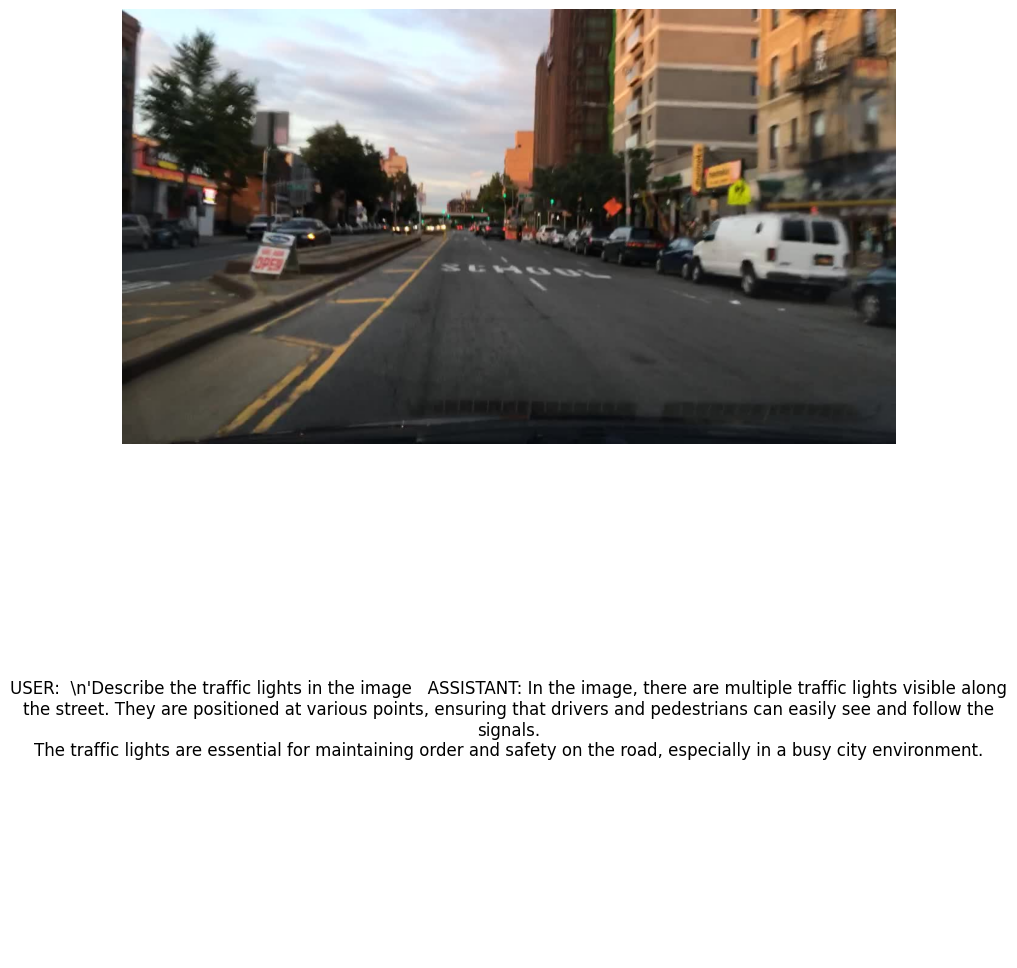

Generated Description for b1c66a42-6f7d68ca.jpg:
USER:  \n'Describe the traffic lights in the image   ASSISTANT: In the image, there are multiple traffic lights visible along
the street. They are positioned at various points, ensuring that drivers and pedestrians can easily see and follow the signals.
The traffic lights are essential for maintaining order and safety on the road, especially in a busy city environment.


In [ ]:
# Display the 1st image and its text
target_index = 0  # 6th image (0-based indexing)

if len(all_outputs) > target_index:
    # Retrieve the 6th output
    sixth_output = all_outputs[target_index]
    sixth_image_name = sixth_output["image_name"]
    sixth_description = sixth_output["generated_text"]
    sixth_image_path = os.path.join(image_directory, sixth_image_name)

    # Load and display the 6th image
    if os.path.exists(sixth_image_path):
        sixth_image = Image.open(sixth_image_path)
        plt.figure(figsize=(10, 10))

        # Get the image width to adjust text wrapping
        image_width, _ = sixth_image.size
        text_wrap_width = int(image_width / 10)  # Adjust wrapping based on image width

        # Replace 'ASSISTANT:' with '\nASSISTANT:' to start a new line
        sixth_description = sixth_description.replace("ASSISTANT:", "\nASSISTANT:")

        # Plot the image
        plt.subplot(2, 1, 1)
        plt.imshow(sixth_image)
        plt.axis('off')

        # Plot the text description below the image
        plt.subplot(2, 1, 2)
        wrapped_text = textwrap.fill(sixth_description, width=text_wrap_width)
        plt.text(0.5, 0.5, wrapped_text, ha='center', va='center', wrap=True, fontsize=12)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Print the description as debug
        print(f"Generated Description for {sixth_image_name}:\n{wrapped_text}")
    else:
        print(f"Image file not found for the 1st image: {sixth_image_path}")
else:
    print("There are fewer than 1 images in the processed outputs.")

In [ ]:
#all_outputs = loaded_all_outputs
print(all_outputs)

[{'image_name': 'b1c66a42-6f7d68ca.jpg', 'generated_text': "USER:  \\n'Describe the traffic lights in the image \nASSISTANT: In the image, there are multiple traffic lights visible along the street. They are positioned at various points, ensuring that drivers and pedestrians can easily see and follow the signals. The traffic lights are essential for maintaining order and safety on the road, especially in a busy city environment."}, {'image_name': 'b1c81faa-3df17267.jpg', 'generated_text': "USER:  \\n'Describe the traffic lights in the image \nASSISTANT: The traffic lights in the image are located on the side of the road, and they are illuminated, indicating that the traffic is moving. The lights are positioned at different heights and angles, which helps to guide the flow of traffic and ensure safety for both drivers and pedestrians."}, {'image_name': 'b1ca2e5d-84cf9134.jpg', 'generated_text': "USER:  \\n'Describe the traffic lights in the image \nASSISTANT: In the image, there are mul

**create dictionary to store ground truth descriptions of images.**



In [ ]:
from collections import OrderedDict

# Initialize an ordered dictionary
image_descriptions = OrderedDict()

# Iterate over the selected images in the given order
for image_name in qualifying_images_batch:
    # Find the corresponding annotation for the image
    for annotation in annotations_data:
        if annotation['name'] == image_name:
            description = ""
            # Object-level details
            for idx, obj in enumerate(annotation['labels'], start=1):  # This will start numbering from 1
                category = obj['category']
                traffic_light_color = obj['attributes'].get('trafficLightColor')
                truncated = obj['attributes'].get('truncated')
                occluded = obj['attributes'].get('occluded')

                # Skip the object if traffic light color is 'NA'
                if traffic_light_color == "NA":
                    continue

                # Add object details to the description
                object_description = f"Object {idx}: {category}, " \
                                     f"Traffic Light Color: {traffic_light_color}. "\
                                     f"Truncated: {truncated}. "\
                                     f"Occluded: {occluded}. "
                description += object_description

            # Store the description in the ordered dictionary
            image_descriptions[image_name] = description
            break  # Move to the next image in selected_images once a match is found

# Now `image_descriptions` maintains the order of `selected_images`


In [ ]:
image_descriptions

OrderedDict([('b1c66a42-6f7d68ca.jpg',
              'Object 5: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. Object 6: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. Object 25: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. Object 26: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. Object 27: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. '),
             ('b1c81faa-3df17267.jpg',
              'Object 4: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. '),
             ('b1ca2e5d-84cf9134.jpg',
              'Object 27: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. Object 28: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. Object 29: traffic light, Traffic Light Color: G. Truncated: False. Occluded: False. Object 30: traffic light, Traffic Light Color: G. Truncated: False. 

In [ ]:
type(image_descriptions)

collections.OrderedDict

In [ ]:
questions = "USER: <image>\\n'Describe the traffic lights in the image \nASSISTANT:"
#questions = ' How many different traffic lights are there, traffic lights of same color should be seen as different? describe each of the traffic light by their color and what they signify. Also tell me for each of the traffic light, if they are occluded and also if it is truncated'

**Embedding Distance to get semantic similarity**

In [ ]:
pip install -q Levenshtein

In [ ]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics import jaccard_score
from Levenshtein import distance as levenshtein_distance
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
from collections import OrderedDict

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# 2. Extract the image name and generated text from all_outputs
predictions = [output['generated_text'] for output in all_outputs]
image_names = [output['image_name'] for output in all_outputs]

# 3. Encode both predictions and ground truth (image descriptions)
predictions_embeddings = model.encode(predictions, convert_to_tensor=True)
ground_truth_embeddings = model.encode(
    [image_descriptions[image_name] for image_name in image_names],
    convert_to_tensor=True
)

# 4. Calculate cosine similarity between predictions and ground truth
cosine_similarities = util.pytorch_cos_sim(predictions_embeddings, ground_truth_embeddings)
average_cosine_similarity = cosine_similarities.mean().item()

# 5. Calculate Jaccard similarity, Levenshtein distance, and BLEU score
jaccard_similarities = []
levenshtein_distances = []
bleu_scores = []

for pred, truth in zip(predictions, [image_descriptions[name] for name in image_names]):
    # Tokenize sentences for Jaccard similarity
    pred_tokens = set(pred.split())
    truth_tokens = set(truth.split())

    # Jaccard Similarity
    if pred_tokens or truth_tokens:  # Avoid division by zero
        jaccard_sim = len(pred_tokens & truth_tokens) / len(pred_tokens | truth_tokens)
    else:
        jaccard_sim = 0
    jaccard_similarities.append(jaccard_sim)

    # Levenshtein Distance
    lev_distance = levenshtein_distance(pred, truth)
    levenshtein_distances.append(lev_distance)


# Calculate averages
average_jaccard_similarity = np.mean(jaccard_similarities)
average_levenshtein_distance = np.mean(levenshtein_distances)

# 6. Print the average scores
print(f"Average Cosine Similarity: {average_cosine_similarity:.4f}")
print(f"Average Jaccard Similarity: {average_jaccard_similarity:.4f}")
print(f"Average Levenshtein Distance: {average_levenshtein_distance:.4f}")

Average Cosine Similarity: 0.5277
Average Jaccard Similarity: 0.0188
Average Levenshtein Distance: 292.0000


**Get LLAVA predictions on detailed prompt**




In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import textwrap

# Base image directory
image_directory = "/content/drive/MyDrive/bdd/images"  # Replace with the directory containing images

# Define the prompt
prompt = "USER: <image>\\n' Identify each trafiic light in this image. For each traffic light, output their color in the format- TraffiColor: (R, G or Y) signifying Red, Green and Yellow respectively. Also ouput if the each traffic light is occluded in the format- Occluded: (True or False). Also ouput if the each traffic light is truncated in the format- Truncated: (True or False) \nASSISTANT:"
#prompt = "USER: <image>\\n'Describe the traffic lights in the image \nASSISTANT:"
# Store all outputs in a list
all_outputs = []

# Iterate through all images in the list
for idx, image_name in enumerate(qualifying_images_batch):
    image_path = os.path.join(image_directory, image_name)

    # Check if the file exists to avoid errors
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    try:
        # Load the image
        image = Image.open(image_path)

        # Generate description using the pipeline
        outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

        # Save the output
        all_outputs.append({
            "image_name": image_name,
            "generated_text": outputs[0]["generated_text"]
        })

    except Exception as e:
        print(f"Error processing {image_name}: {e}")



In [ ]:
# Display the 1st image and its text
target_index = 0  # 6th image (0-based indexing)

if len(all_outputs) > target_index:
    # Retrieve the 1st output
    sixth_output = all_outputs[target_index]
    sixth_image_name = sixth_output["image_name"]
    sixth_description = sixth_output["generated_text"]
    sixth_image_path = os.path.join(image_directory, sixth_image_name)

    # Load and display the 1st image
    if os.path.exists(sixth_image_path):
        sixth_image = Image.open(sixth_image_path)
        plt.figure(figsize=(10, 10))

        # Get the image width to adjust text wrapping
        image_width, _ = sixth_image.size
        text_wrap_width = int(image_width / 10)  # Adjust wrapping based on image width

        # Replace 'ASSISTANT:' with '\nASSISTANT:' to start a new line
        sixth_description = sixth_description.replace("ASSISTANT:", "\nASSISTANT:")

        # Plot the image
        plt.subplot(2, 1, 1)
        plt.imshow(sixth_image)
        plt.axis('off')

        # Plot the text description below the image
        plt.subplot(2, 1, 2)
        wrapped_text = textwrap.fill(sixth_description, width=text_wrap_width)
        plt.text(0.5, 0.5, wrapped_text, ha='center', va='center', wrap=True, fontsize=12)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Print the description as debug
        print(f"Generated Description for {sixth_image_name}:\n{wrapped_text}")
    else:
        print(f"Image file not found for the 1st image: {sixth_image_path}")
else:
    print("There are fewer than 1 images in the processed outputs.")

In [ ]:
questions = "USER: <image>\\n'Identify each trafiic light in this image. For each traffic light, output their color in the format- TraffiColor: (R, G or Y) signifying Red, Green and Yellow respectively. Also ouput if the each traffic light is occluded in the format- Occluded: (True or False). Also ouput if the each traffic light is truncated in the format- Truncated: (True or False) \nASSISTANT:"

Embedding Distance to get semantic similarity on detailed input predictions

In [ ]:


# 2. Extract the image name and generated text from all_outputs
predictions = [output['generated_text'] for output in all_outputs]
image_names = [output['image_name'] for output in all_outputs]

# 3. Encode both predictions and ground truth (image descriptions)
predictions_embeddings = model.encode(predictions, convert_to_tensor=True)
ground_truth_embeddings = model.encode(
    [image_descriptions[image_name] for image_name in image_names],
    convert_to_tensor=True
)

# 4. Calculate cosine similarity between predictions and ground truth
cosine_similarities = util.pytorch_cos_sim(predictions_embeddings, ground_truth_embeddings)
average_cosine_similarity = cosine_similarities.mean().item()

# 5. Calculate Jaccard similarity, Levenshtein distance, and BLEU score
jaccard_similarities = []
levenshtein_distances = []
bleu_scores = []

for pred, truth in zip(predictions, [image_descriptions[name] for name in image_names]):
    # Tokenize sentences for Jaccard similarity
    pred_tokens = set(pred.split())
    truth_tokens = set(truth.split())

    # Jaccard Similarity
    if pred_tokens or truth_tokens:  # Avoid division by zero
        jaccard_sim = len(pred_tokens & truth_tokens) / len(pred_tokens | truth_tokens)
    else:
        jaccard_sim = 0
    jaccard_similarities.append(jaccard_sim)

    # Levenshtein Distance
    lev_distance = levenshtein_distance(pred, truth)
    levenshtein_distances.append(lev_distance)


# Calculate averages
average_jaccard_similarity = np.mean(jaccard_similarities)
average_levenshtein_distance = np.mean(levenshtein_distances)

# 6. Print the average scores
print(f"Average Cosine Similarity: {average_cosine_similarity:.4f}")
print(f"Average Jaccard Similarity: {average_jaccard_similarity:.4f}")
print(f"Average Levenshtein Distance: {average_levenshtein_distance:.4f}")

**pickle**

In [ ]:
#for simple prompt

In [ ]:
import pickle

# # Define the path in Google Drive
file_path = '/content/drive/My Drive/response_for_simple_prompt.pkl'

# # Save the variable to Google Drive
with open(file_path, "wb") as file:
    pickle.dump(all_outputs, file)

print("Variable stored successfully in Google Drive!")


In [ ]:
#read file
# Load the variable from Google Drive
with open(file_path, "rb") as file:
    loaded_all_outputs = pickle.load(file)

#print("Loaded data:", loaded_all_outputs)
print(len(loaded_all_outputs))

20


In [ ]:
#for detailed prompt

In [ ]:
import pickle

# Define the path in Google Drive
file_path = '/content/drive/My Drive/response_for_detailed_prompt.pkl'

# Save the variable to Google Drive
with open(file_path, "wb") as file:
    pickle.dump(all_outputs, file)

print("Variable stored successfully in Google Drive!")


In [ ]:
# #read file
# # Load the variable from Google Drive
# with open(file_path, "rb") as file:
#     loaded_all_outputs = pickle.load(file)

# #print("Loaded data:", loaded_all_outputs)
# print(len(loaded_all_outputs))